# Before you start :
   - These exercises are related to the Pivot table and correlation lessons.
   - Keep in mind that you need to use some of the functions you learned in the previous lessons.
   - All datasets are provided in the `your-code` folder of this lab.
   - Elaborate your codes and outputs as much as you can.
   - Try your best to answer the questions and complete the tasks and most importantly enjoy the process!!!

#### Import all the libraries that are necessary.

In [87]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# Challenge 1

#### Open the ` Employee.csv` file and name your dataset `employee`.

In [6]:
employee = pd.read_csv('data\Employee.csv')
employee.head()

,Name,Department,Education,Gender,Title,Years,Salary
0,Jose,IT,Bachelor,M,analyst,1,35
1,Maria,IT,Master,F,analyst,2,30
2,David,HR,Master,M,analyst,2,30
3,Sonia,HR,Bachelor,F,analyst,4,35
4,Samuel,Sales,Master,M,associate,3,55


#### What's the mean salary by department?
Hint : There are 2 ways to do it - one way is with groupby and the other way is with pivot tables. Do it both ways. 


In [8]:
# Method 1
mean_salary = employee.groupby('Department').agg({'Salary':'mean'})
mean_salary

,Salary
Department,
HR,45.00
IT,48.75
Sales,55.00


In [12]:
# Method 2
mean_salary_pivot = employee.pivot_table(index='Department').reset_index()
mean_salary_pivot

,Department,Salary,Years
0,HR,45.00,4.666667
1,IT,48.75,4.500000
2,Sales,55.00,2.500000


#### We want now to group the data by more than one column. Use Pandas pivot table function to select the mean salary by department and title.

In [19]:
mean_salary_dpt_title = employee.pivot_table(index=['Department', 'Title'])
mean_salary_dpt_title


Salary  Years
Department Title                   
HR         VP           70.0    8.0
           analyst      32.5    3.0
IT         VP           70.0    8.0
           analyst      32.5    1.5
           associate    60.0    7.0
Sales      associate    55.0    2.5

#### We want to display the number of years of work experience and the salary for each Title. Add Years as a column in your pivot table.
*Hint: Use Pandas doc(see References in README.md) to explore the pivot_table() arguments*

In [22]:
title_info = employee.pivot_table(index=['Department', 'Title'], columns='Years').fillna('n/a')
title_info


Salary                         
Years                     1    2    3    4    7    8
Department Title                                    
HR         VP           n/a  n/a  n/a  n/a  n/a   70
           analyst      n/a   30  n/a   35  n/a  n/a
IT         VP           n/a  n/a  n/a  n/a  n/a   70
           analyst       35   30  n/a  n/a  n/a  n/a
           associate    n/a  n/a  n/a  n/a   60  n/a
Sales      associate    n/a   55   55  n/a  n/a  n/a

#### We want to know the information about the mean salary and number of employees in each department and for each job title.

In [46]:
pivot_table = employee.pivot_table(index=['Department', 'Title'], aggfunc = {'Salary':'mean', 'Years':'count'})
pivot_table.rename(columns={"Years": "No. of empl."})
pivot_table


Salary  Years
Department Title                   
HR         VP           70.0      1
           analyst      32.5      2
IT         VP           70.0      1
           analyst      32.5      2
           associate    60.0      1
Sales      associate    55.0      2

#### We want to know for each department and for each job title the Salary's median, minimum, maximum and standard deviation. Comment your results.

In [50]:
pivot_table = employee.pivot_table(index=['Department', 'Title'], aggfunc = {'Salary':('median', 'min', 'max', 'std')})
pivot_table

Salary                       
                        max median   min       std
Department Title                                  
HR         VP          70.0   70.0  70.0       NaN
           analyst     35.0   32.5  30.0  3.535534
IT         VP          70.0   70.0  70.0       NaN
           analyst     35.0   32.5  30.0  3.535534
           associate   60.0   60.0  60.0       NaN
Sales      associate   55.0   55.0  55.0  0.000000

#### Based on your comments, fill the missing values with an appropriate value.

In [51]:
pivot_table = employee.pivot_table(index=['Department', 'Title'], aggfunc = {'Salary':('median', 'min', 'max', 'std')}).fillna('n/a')
pivot_table

Salary                      
                        max median   min      std
Department Title                                 
HR         VP          70.0   70.0  70.0      n/a
           analyst     35.0   32.5  30.0  3.53553
IT         VP          70.0   70.0  70.0      n/a
           analyst     35.0   32.5  30.0  3.53553
           associate   60.0   60.0  60.0      n/a
Sales      associate   55.0   55.0  55.0        0

#### The stake holders want to know for each department the number of employees and how much money is spend on salaries. Could you provide that information? 

In [58]:
pivot_table = employee.pivot_table(index=['Department'], aggfunc = {'Salary':'sum', 'Years':'count'})
pivot_table = pivot_table.rename(columns={'Salary': 'Total salary expense',"Years": "No. of empl."})
pivot_table

,Total salary expense,No. of empl.
Department,,
HR,135,3
IT,195,4
Sales,110,2


#### For each Department and Title, we want to know the the total years of work experience and the mean salary.

In [60]:
pivot_table = employee.pivot_table(index=['Department', 'Title'], aggfunc = {'Years':'sum', 'Salary':'mean'})
pivot_table = pivot_table.rename(columns={'Salary': 'Mean salary',"Years": "Total exp. work years"})
pivot_table


Mean salary  Total exp. work years
Department Title                                        
HR         VP                70.0                      8
           analyst           32.5                      6
IT         VP                70.0                      8
           analyst           32.5                      3
           associate         60.0                      7
Sales      associate         55.0                      5

### Bonus

#### We now want to compute the mean salary after removing the maxima for each Department. Create the appropriate pivot table.

Hint: Write a custom function.

In [ ]:
# your answer here


# Challenge 2

#### Open the ` Fitbit.csv` file and name your dataset `fitbit`.

In [62]:
fitbit = pd.read_csv('data\Fitbit.csv')
fitbit.head()


,Date,Calorie burned,Steps,Distance,Floors,Minutes Sedentary,Minutes Lightly Active,Minutes Fairly Active,Minutes Very Active,Activity Calories,MinutesOfSleep,MinutesOfBeingAwake,NumberOfAwakings,LengthOfRestInMinutes
0,08-05-2015,1934,905,0.65,0,1.355,46,0,0,1680,384,26,23,417
1,09-05-2015,3631,18925,14.11,4,611.000,316,61,60,2248,454,35,21,491
2,10-05-2015,3204,14228,10.57,1,602.000,226,14,77,1719,387,46,25,436
3,11-05-2015,2673,6756,5.02,8,749.000,190,23,4,9620,311,31,21,350
4,12-05-2015,2495,502,3.73,1,876.000,171,0,0,7360,407,65,44,491


#### Explore you dataset in terms of data types and descriptive statistics.
Hint: Use Pandas functions from previous lectures.

In [71]:
fitbit.select_dtypes(include=['float64', 'int64'])

,Calorie burned,Steps,Distance,Floors,Minutes Sedentary,Minutes Lightly Active,Minutes Fairly Active,Minutes Very Active,Activity Calories,MinutesOfSleep,MinutesOfBeingAwake,NumberOfAwakings,LengthOfRestInMinutes
0,1934,905,0.65,0,1.355,46,0,0,1680,384,26,23,417
1,3631,18925,14.11,4,611.000,316,61,60,2248,454,35,21,491
2,3204,14228,10.57,1,602.000,226,14,77,1719,387,46,25,436
3,2673,6756,5.02,8,749.000,190,23,4,9620,311,31,21,350
4,2495,502,3.73,1,876.000,171,0,0,7360,407,65,44,491
...,...,...,...,...,...,...,...,...,...,...,...,...,...
362,3796,18588,14.13,16,599.000,275,49,79,236,377,33,18,410
363,3525,16382,12.39,16,684.000,333,10,55,2075,406,21,8,427
364,3649,21913,16.40,19,701.000,287,29,90,2249,280,35,15,315
365,3539,19023,14.79,15,575.000,298,8,85,2112,370,42,22,412


In [72]:
fitbit.select_dtypes(include=['object'])


,Date
0,08-05-2015
1,09-05-2015
2,10-05-2015
3,11-05-2015
4,12-05-2015
...,...
362,03-05-2016
363,04-05-2016
364,05-05-2016
365,06-05-2016


#### You suspect that there must be a linear relationship between the Minutes Very Active and the Steps. Compute the correlation between these variables.

In [79]:
fitbit['Minutes Very Active'].corr(fitbit['Steps'])
# we can see that some correlation exists

0.5714518481062608

#### Use matplotlib to visually plot Minutes Very active vs Steps. 

##### Hint : import matplotlib.pyplot as plt (See previous lessons)#####
- Use plt.scatter(x=df['col_name_1'], y=df['col_name_2'])

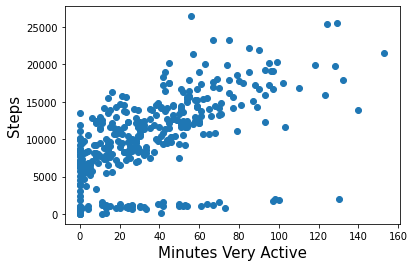

In [81]:
plt.scatter(fitbit['Minutes Very Active'], fitbit['Steps'])
plt.xlabel("Minutes Very Active",fontsize=15)
plt.ylabel("Steps", fontsize=15)
plt.show()

#### What can you say about Minute Very Active and Steps? Write a comment below

In [ ]:
# We can see that there's a linear relationship between 'Minutes Very Active' and 'Steps', 
# the more minutes active we have, the more steps the person will do. We can also see that doing a lot of 
# steps doesn't mean that the person will have very active minutes.


#### We also suspect that there must be a linear relationship between the Minutes Sedentary and the Steps. Compute the correlation between these variables.

In [82]:
fitbit['Minutes Sedentary'].corr(fitbit['Steps'])
# we can see that the correlation is not high at all

0.07690608062990091

#### Use matplotlib to visually plot Minutes Sedentary vs Steps. Based on the results of the computed correlation and the plot. What can you say about these 2 variables?

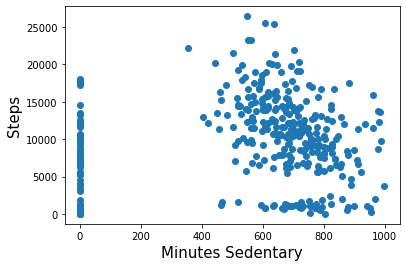

In [83]:
plt.scatter(fitbit['Minutes Sedentary'], fitbit['Steps'])
plt.xlabel("Minutes Sedentary",fontsize=15)
plt.ylabel("Steps", fontsize=15)
plt.show()

# we can see that there is not an apparent correlation as all the data is very spread. We can say that 
# there is a small correlation between where the higher the minutes sedentary the lower the steps that that person has done.

#### We also suspect that there must be a linear relationship between the MinutesOfSleep and the Steps. Compute the correlation between these variables.

In [85]:
fitbit['MinutesOfSleep'].corr(fitbit['Steps'])
# we can see that the correlation is not very high

0.1309856595083638

#### Use matplotlib to visually plot MinutesOfSleep vs Steps. Based on the results of the computed correlation and the plot. What can you say about these 2 variables?

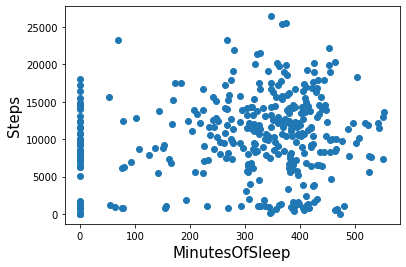

In [86]:
plt.scatter(fitbit['MinutesOfSleep'], fitbit['Steps'])
plt.xlabel("MinutesOfSleep",fontsize=15)
plt.ylabel("Steps", fontsize=15)
plt.show()

# The data is pretty spread, cannot really tell there's any correlation between these two variables.

#### Select a subset of your dataset with the columns below and compute the correlation matrix. Save the results in the variable `cor_fit`
column= ['Calorie burned', 'Steps','Floors','Minutes Sedentary','Minutes Very Active', 'MinutesOfSleep']

In [92]:
column = fitbit[['Calorie burned', 'Steps','Floors','Minutes Sedentary','Minutes Very Active', 'MinutesOfSleep']]
cor_fit = column.corr()
cor_fit



,Calorie burned,Steps,Floors,Minutes Sedentary,Minutes Very Active,MinutesOfSleep
Calorie burned,1.000000,0.255305,0.130757,0.125353,0.197881,0.011485
Steps,0.255305,1.000000,0.306511,0.076906,0.571452,0.130986
Floors,0.130757,0.306511,1.000000,0.057812,0.399503,0.069464
Minutes Sedentary,0.125353,0.076906,0.057812,1.000000,0.105963,0.204242
Minutes Very Active,0.197881,0.571452,0.399503,0.105963,1.000000,0.108018
MinutesOfSleep,0.011485,0.130986,0.069464,0.204242,0.108018,1.000000


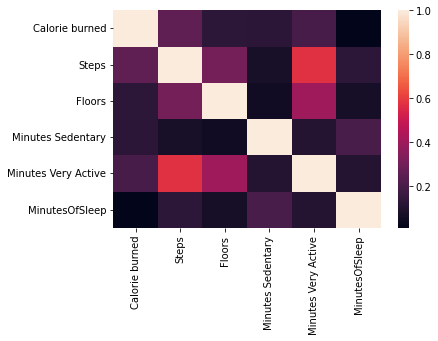

In [93]:
sns.heatmap(cor_fit)
plt.show()

#### Based on the result of the correlation matrix. What are the highly correlated features with the variable Steps?
*Hint: From the results above select the variable Steps and order your results in descending order (use Pandas sort_values function)*

In [96]:
# From the correlation matrix above (and heatmap too) we can see that the most highly correlated values are:
#  - Steps with calories burned
#  - Floors with steps
#  - Minutes very active with steps
#  - Minutes very active with floors

# Challenge 3

#### Open the `Time_Grades.csv` file and name your dataset `time_grades`.

In [98]:
time_grades = pd.read_csv('data\Time_Grades.csv')
time_grades.head()

,Name,Study time,Grade
0,Jose,4,4
1,Maria,9,7
2,David,8,9
3,Sonia,10,7
4,Samuel,20,9


#### Show visually the frequency distribution of the time_grades dataset.

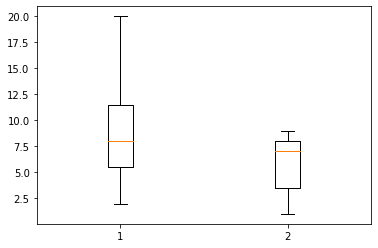

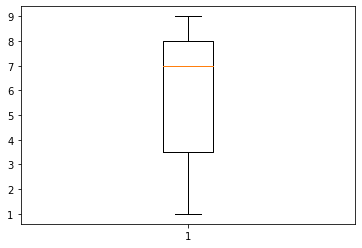

In [119]:
plt.boxplot(time_grades[["Study time",'Grade']])
plt.show()

#### Is there a correlation between study time and Grade? Use both Pearson and Spearman correlation and comment your results.

In [121]:
# Pearson
correlation = time_grades.corr()
print(correlation.loc['Study time', 'Grade'])

# Spearman
correlation = time_grades.corr(method="spearman")
print(correlation.loc['Study time', 'Grade'])

# Both models show that both columns are highly correlated. 

0.7980456073578855
0.8196587530369419


#### Use matplotlib to visually plot Study time vs Grade. Based on the results of the computed correlation and the plot. What can you say about these 2 variables?

Text(0, 0.5, 'Grade')

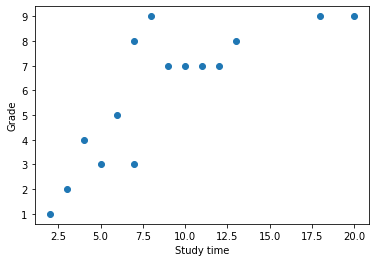

In [115]:
plt.scatter(time_grades['Study time'], time_grades['Grade'])
plt.xlabel('Study time')
plt.ylabel('Grade')

# We can say that the more you study, the more likely you are to get high grades. The columns are correlated.


#### Could you explain the difference between Pearson and Spearman correlation? (see References in README.md) 

In [ ]:
# Pearson correlation tries to see if two sets of observations are linked in a linear way, 
# whereas Spearman only cares about the ranks of the observations. Not about the magnitude.
# In this case I think Spearman would be slightly more accurate than Pearson, because if we see the 
# scatter plot down below we will see that it doesn't follow an exact linear way, so it will be a little
# less correlated if we do the Pearson one, as we can see in the output of this cell.